### Assignment 1: Write an ipython notebook that demonstrates visually in a data-driven way the Central Limit Theorem. 
A skeleton notebook is [here](https://github.com/fedhere/PUI2017_fb55/blob/master/HW3_fb55/Assignment1.ipynb)

- GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), _all with the same population mean_
- Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.    

In [1]:
from collections import defaultdict

import numpy as np

np.random.seed(422)

mean = 42

# tuples of the form (dist, args)
dists = [(np.random.poisson, (mean,)),
         (np.random.binomial,(mean  * 2, .5)),
         (np.random.normal,(mean,)),
         (np.random.chisquare, (mean,)),
         (np.random.gamma, (mean,))]
samples_by_dist = defaultdict(list)
for dist, args in dists:
    for _ in xrange(100):
        N = np.random.randint(11, 2000)
        samples_by_dist[dist.__name__].append(dist(*args, size=N))

- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


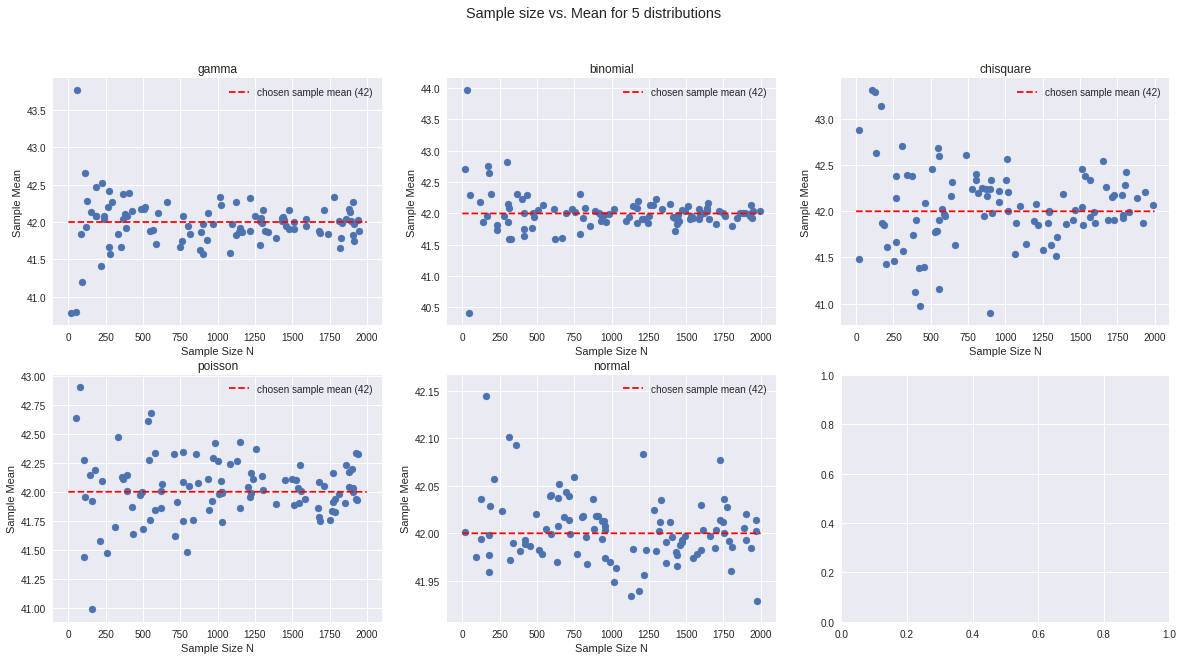

In [2]:
import matplotlib.pylab as pl
import seaborn as sns
%pylab inline
fig = plt.figure(1, figsize=(20, 20))
figs, axes = plt.subplots(2, 3, figsize=(20, 10))

for ax, (name, samples) in zip(axes.flatten()[:5], samples_by_dist.items()):
    ax.scatter([len(s) for s in samples], [s.mean() for s in samples])
    ax.plot(range(2000), [42] * 2000, 'r--', label="chosen sample mean (42)")
    ax.legend()
    ax.set_title(name)
    ax.set_xlabel("Sample Size N")
    ax.set_ylabel("Sample Mean")

plt.suptitle("Sample size vs. Mean for 5 distributions", fontsize="x-large")

- Describe the behavior you see in the plots in terms of the law of large numbers

### this is also my caption

As N increases, we see that our points converge around our chosen mean 42. This is because of the central limit theorem's conclusion about sample means converging as sample size increases.
The red line is just our mean, 42

- PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing

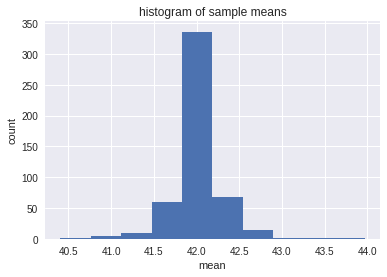

In [3]:
# this is "legacy code" from when i thought i could plot one scatterplot of all dists
vals = [(np.mean(d), len(d)) for x in samples_by_dist.itervalues() for d in x]

plt.hist([v[0] for v in vals])
plt.xlabel("mean")
plt.ylabel("count")
plt.title("histogram of sample means")

### Caption
We can see visually that this resembles a sample of normally distributed values. Which is exactly what we'd expect from the central limit theorem for our sample means.

__Extra Credit__: FIT a gaussian to the distribution of means    

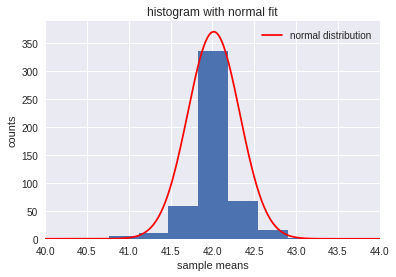

In [4]:
import scipy.stats

# plot means
means = np.array([v[0] for v in vals])
std =  means.std(ddof=1)
plt.hist(means)

# now fit the normal curve
x = np.r_[38:45:500j]
#+.25 and -.25 are the magic binning numbers
count = means[(means < means.mean() + .25) & (means > means.mean() - .25)].size
max_val = count / scipy.stats.norm.pdf(means.mean(), loc=means.mean(), scale=std)
plt.plot(x, max_val * scipy.stats.norm.pdf(x, loc=means.mean(), scale=std), 'r-', label="normal distribution")

plt.xlabel("sample means")
plt.xlim(40, 44)
plt.ylabel("counts")
plt.legend()
plt.title("histogram with normal fit")

### Caption
Using the parameter estimates we fit a normal distribution and see that it is a good fit. This does not prove the central limit theorem but is a strong visual indicator.

### Alternate caption
![normal distribution](http://www.picken.com/img/s/v-3/p1355882478-3.jpg)

But this has too little kurtosis!

### GRADING: 

Your notebook must: 
- generate the distributions, correctly generated for each of the 5 ditributions, all with same mean. ✓
- display all plots: a scatter plot per distribution and a histogram of all distributions, usual rules for plotting applying: visible and readable axes, title, legend, caption. ✓
- each plot must have a caption which describes the plot in terms of Central Limit Theorem ✓ 